In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Capacity 1

In [45]:
df = pd.read_csv('./drone_performance_on_obstacles.csv')

df.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation
0,20,1,5,126.981127,128.069106,127.652572
1,20,1,5,141.668799,141.911550,142.276957
2,20,1,5,176.704448,178.197319,176.814337
3,20,1,5,169.232127,170.302905,168.517190
4,20,1,5,148.602833,150.327215,152.370102


In [46]:
print("Average distance with no obstacle \t\t\t\t:", df[df['drone_capacity']==1]['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df[df['drone_capacity']==1]['with_obstacle_distance'].mean())
print("Average distance with obstacle avoidance and relocation of dp \t:",df[df['drone_capacity']==1]['distance_after_dp_relocation'].mean())

Average distance with no obstacle 				: 147.53627833499925
Average distance with obstacle avoidance 			: 149.1159588505859
Average distance with obstacle avoidance and relocation of dp 	: 148.97244041945785


In [47]:
df_cap_1 = df[df['drone_capacity']==1]

df_cap_1.tail()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation
24,20,1,5,142.580856,145.468489,144.406287
25,20,1,5,143.961048,144.015574,143.820673
26,20,1,5,150.603419,151.499411,151.272238
27,20,1,5,137.900167,139.397075,138.511609
28,20,1,5,139.013572,142.229417,141.894780


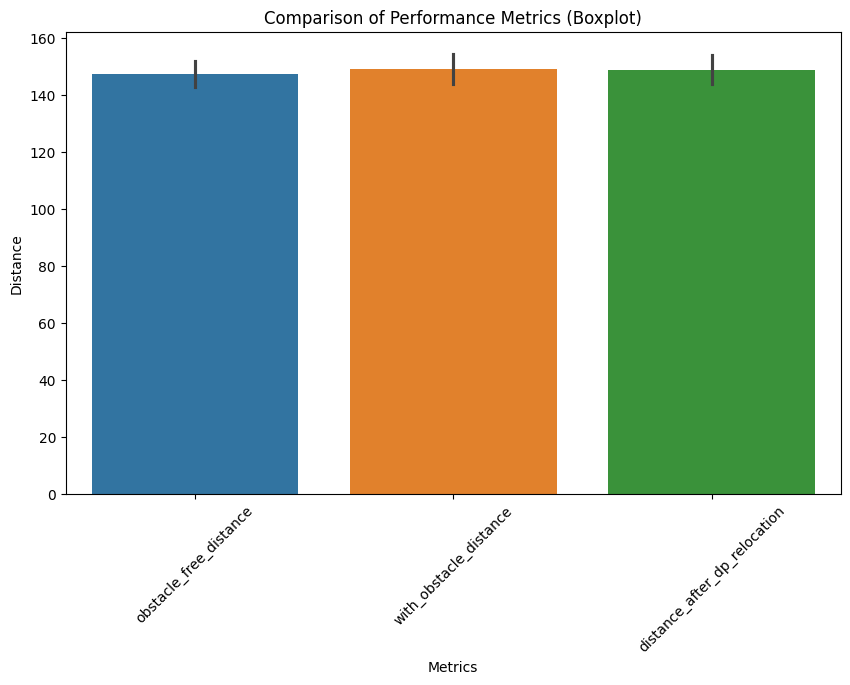

In [48]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_1.iloc[:, -3:])
plt.title('Comparison of Performance Metrics (Boxplot)')
plt.xlabel('Metrics')
plt.ylabel('Distance')
plt.xticks(ticks=[0, 1, 2], labels=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


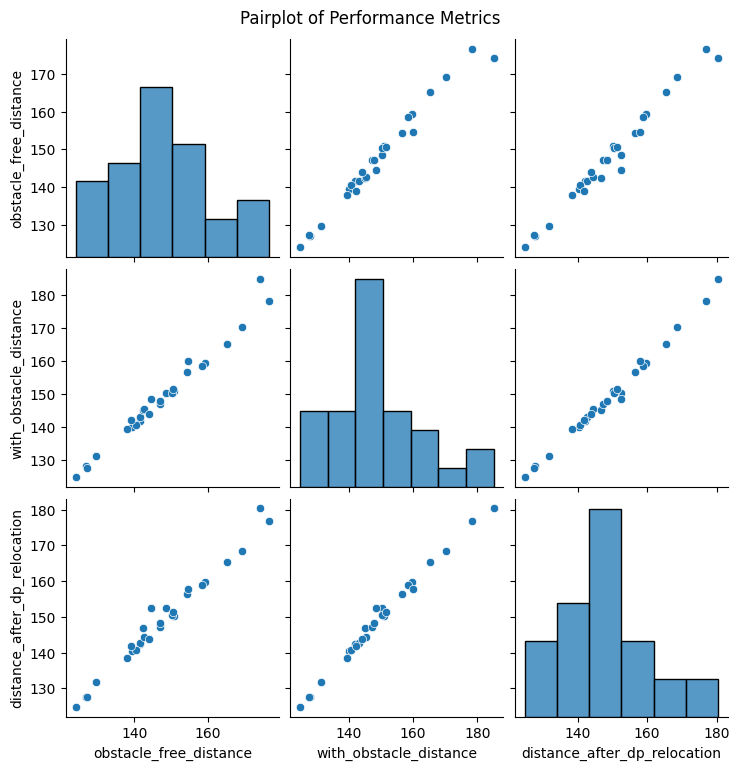

In [49]:
# Pairplot
sns.pairplot(df_cap_1.iloc[:, -3:])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

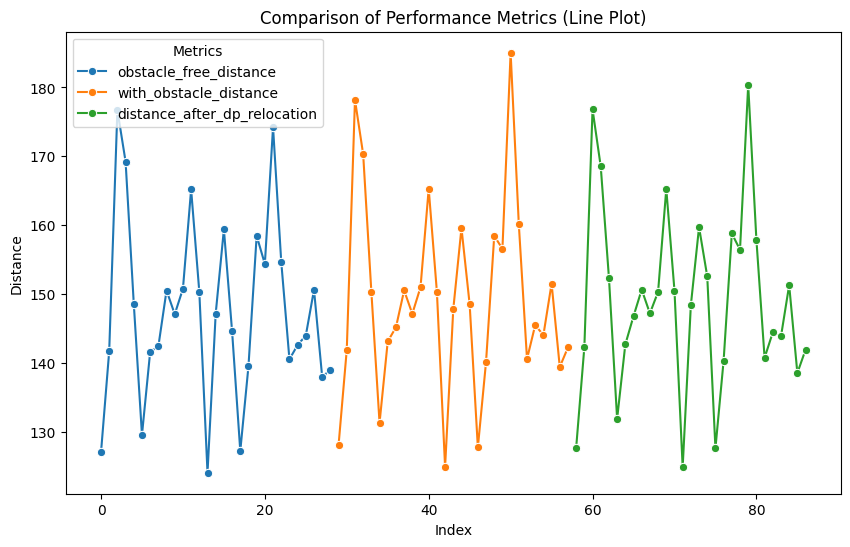

In [50]:
melted_df = df_cap_1.melt(value_vars=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

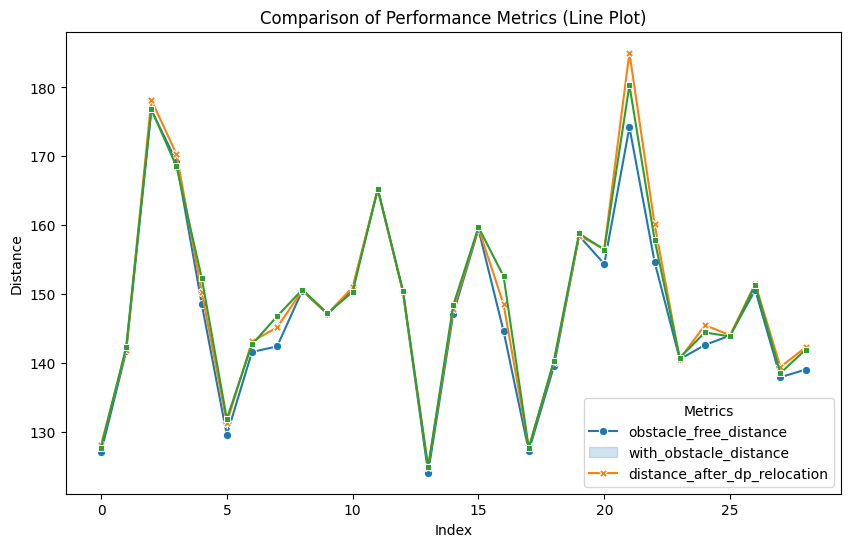

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cap_1.iloc[:, -3:], dashes=False, markers=True)
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics', labels=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'])
plt.show()

## Capacity K

In [52]:
df_cap_k = df[df['drone_capacity'] > 1]
df_cap_k = df_cap_k.drop('distance_after_dp_relocation', axis=1)
df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance
29,20,5,5,60.121870,60.818755
30,20,5,5,58.234078,58.306966
31,20,5,5,59.490894,59.490894
32,20,5,5,54.584135,55.651152
33,20,5,5,56.387633,56.778665


In [53]:
print("Average distance with no obstacle \t\t\t\t:", df_cap_k['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df_cap_k['with_obstacle_distance'].mean())

Average distance with no obstacle 				: 86.85538334828078
Average distance with obstacle avoidance 			: 87.442055658859


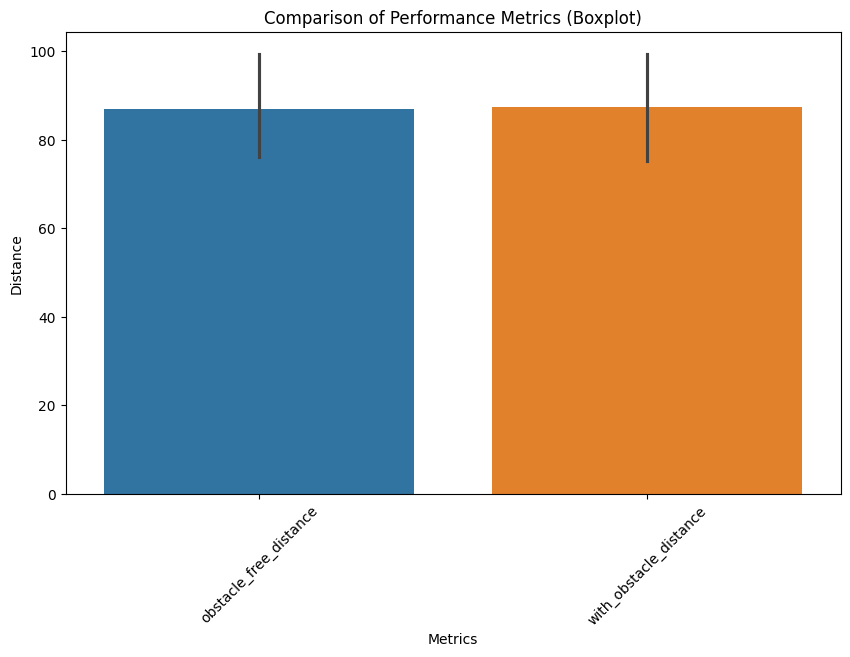

In [58]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_k.iloc[:, -2:], estimator='mean')
plt.title('Comparison of Performance Metrics (Boxplot)')
plt.xlabel('Metrics')
plt.ylabel('Distance')
plt.xticks(ticks=[0, 1], labels=['obstacle_free_distance', 'with_obstacle_distance'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


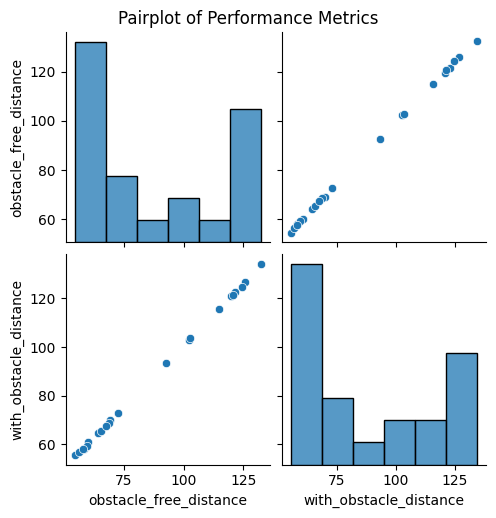

In [59]:
# Pairplot
sns.pairplot(df_cap_k.iloc[:, -2:])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

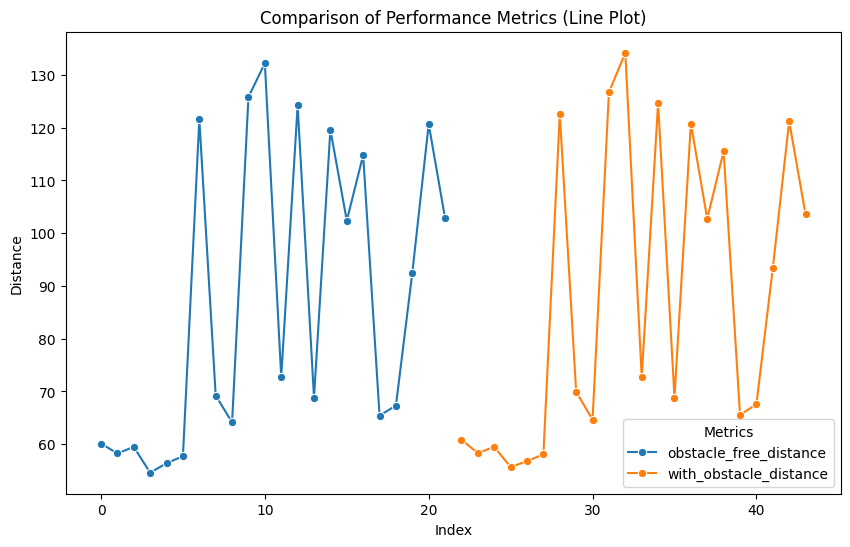

In [60]:
melted_df = df_cap_k.melt(value_vars=['obstacle_free_distance', 'with_obstacle_distance'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

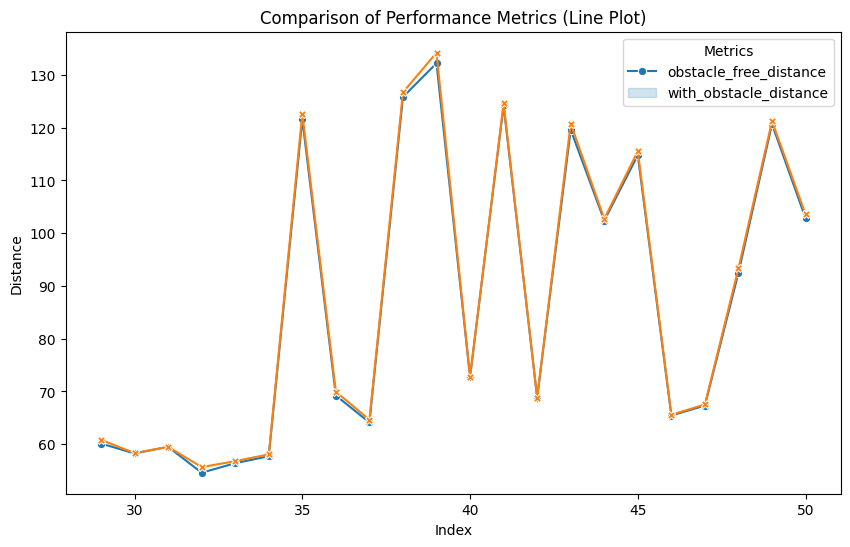

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cap_k.iloc[:, -2:], dashes=False, markers=True)
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics', labels=['obstacle_free_distance', 'with_obstacle_distance'])
plt.show()